<a href="https://colab.research.google.com/github/jimin18/jimin/blob/master/hello_xor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [ ]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#train = tf.train.AdamOptimizer(learning_rate=0.001)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
sess = tf.Session()

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
vcost =[]

In [ ]:
for step in range(20001):
    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
      print(cost1)

0.81745183
0.68982697
0.6881307
0.6866883
0.6849845
0.68293124
0.6804187
0.67730665
0.67341864
0.6685404
0.66242856
0.6548385
0.6455739
0.6345469
0.6218131
0.60755247
0.59199655
0.5753406
0.55766934
0.53891873
0.51885647


Text(0.5, 0, 'epoch')

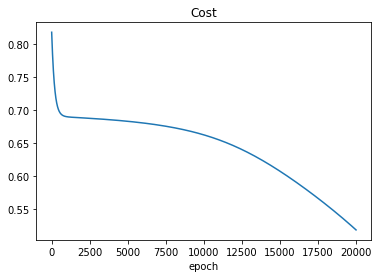

In [ ]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})

In [ ]:
print(test1[0][0])

0.25946918


In [ ]:
for i in range(4):
  print(x_data[i], y_data[i], '-------predict : ',test1 )

[0. 0.] [0.] -------predict :  [[0.25946918]]
[0. 1.] [1.] -------predict :  [[0.25946918]]
[1. 0.] [1.] -------predict :  [[0.25946918]]
[1. 1.] [0.] -------predict :  [[0.25946918]]


In [ ]:
acc1 = sess.run(accuracy, feed_dict={X: x_data, Y: y_data})
print(acc1)

0.75


In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})